In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math

In [2]:
from astropy.table import Table
t = Table.read('../../ijoncour/StandCat/Tgas200_Wright2003_2MASS_FinCat.vot', format='votable')

In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [4]:
#Rename columns
Source = t["Source"]
Gmag = t["__Gmag_"]
Vmag = t["VTmag"]
Bmag = t["BTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
QFlags = t["Qfl"]
DistW = t["Dist"]
s1= t["d_arcsec"]
s2 = t["d_arcsec_2"]
plx = t['Plx']
Teff = t['Teff']
e_Jmag = t['e_Jmag']
e_Kmag = t['e_Kmag']
e_Hmag = t['e_Hmag']
SpType = t["SpType"]
dup = t['Dup']

In [5]:
#calculate distance and absolute magnitudes and plot color index vs. absolute g magnitude for different luminosity classes
Dist = 1000./t["Plx"]
Vmags = t['VTmag'] - 5 * np.log10(Dist) + 5
Bmags = t['BTmag'] - 5 * np.log10(Dist) + 5
Gmags = t['__Gmag_'] - 5 * np.log10(Dist) + 5
Jmags = t['Jmag'] -5 * np.log10(Dist) + 5
Hmags = t['Hmag'] - 5 * np.log10(Dist) + 5
Kmags = t['Kmag'] - 5 * np.log10(Dist) + 5

In [6]:
#mask all values with dup = 1
imask = 0
for i in range(0,len(dup)):
    if (dup[i] > 0.5):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0,len(dup)):
    if(dup[i] > 0.5):
        print(i,dup[i])
print(" Masked ",imask," rows in which dup is equal to 1")

 Masked  25429  rows in which dup is equal to 1


In [7]:
#look at number of duplicate matches
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t["_2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Tdups):
            print(Source[i],s1[i],s2[i],Gmag[i],Vmag[i]-Gmag[i],Jmag[i],Kmag[i],TwoM[i])

GAIA Duplicate Source:  6726788842835559552
GAIA Duplicate Source:  5140648418166947328
GAIA Duplicate Source:  2520020864918288896
GAIA Duplicate Source:  5959478126358758016
GAIA Duplicate Source:  6668487925962916480
GAIA Duplicate Source:  1214512606941823360
GAIA Duplicate Source:  4097002323363211776
GAIA Duplicate Source:  5769091159655753856
GAIA Duplicate Source:  6790250970359184768
GAIA Duplicate Source:  5123327399177495808
GAIA Duplicate Source:  6785793275342096256
GAIA Duplicate Source:  2498832038900176000
GAIA Duplicate Source:  5324415053561705216
GAIA Duplicate Source:  2067478096721765376
GAIA Duplicate Source:  4785096491234658304
GAIA Duplicate Source:  5447076227156166528
GAIA Duplicate Source:  6054493694983536384
GAIA Duplicate Source:  5133580860502607104
GAIA Duplicate Source:  452193638896601088
GAIA Duplicate Source:  1837550183626334848
GAIA Duplicate Source:  3248442439236776960
GAIA Duplicate Source:  4392970203357519360
GAIA Duplicate Source:  567531810

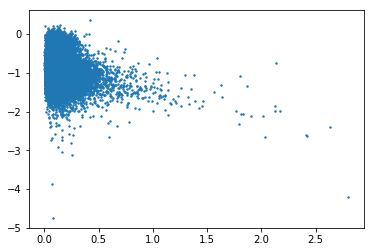

-0.878488668698
0.295729219034


In [8]:
J_G = Jmag-Gmag
plt.scatter(s1,J_G,s=2.0)
plt.show()
JGmean = np.mean(J_G)
JGstd = np.std(J_G)
print(JGmean)
print(JGstd)

 Masked  27  rows based on J-G color > 5 sigma from mean


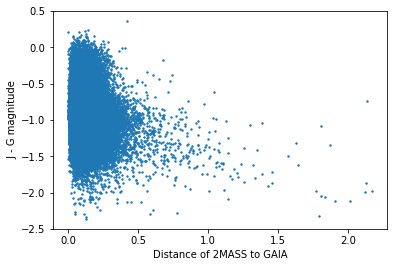

New sigma for J-G:  0.29215581638


In [9]:
#masked rows with J-G greater than 5 sigma from mean
imask = 0
for i in range(0,len(J_G)):
    if(abs(J_G[i] - JGmean) > 5*JGstd):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
print(" Masked ",imask," rows based on J-G color > 5 sigma from mean")
J_G = Jmag - Gmag
plt.xlabel("Distance of 2MASS to GAIA")
plt.ylabel(" J - G magnitude")
plt.scatter(s1,J_G,s=2.0)
plt.show()
print("New sigma for J-G: ",np.std(J_G))

In [10]:
#Translate Spectra Type luminosity class into a number from 1 to 5
#or a negative number if it is a binary or unknown spectral type.
#Note that many stars do not have a luminosity class. There are given 5.1.

SpTypeN = [0.0]*len(SpType)
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)

Finished Luminosity Class Translation
  Number of single Stars:  49713   Binaries or Unknown luminosity class:  428


In [11]:
#Split class V stars into different temperature ranges and find avg, min, max, and standard deviation of each range
temps = [3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10500]
num_stars = np.zeros(len(temps))
temp_cat = np.zeros(len(Teff))
tavg = []
tmin = []
tmax = []
t_stdev = []
j = 0
for t1 in temps: 
    stars = 0
    t2 = t1 + 500
    temp_array = []
    for i in range(len(Teff)):
        if (SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
            if (Teff[i] >= t1 and Teff[i] < t2):
                temp_cat[i] = t1
                temp_array = np.append(temp_array, Teff[i])
                stars = stars+1
    tavg = np.append(tavg,np.mean(temp_array))
    tmax = np.append(tmax,np.max(temp_array,axis =0))
    tmin = np.append(tmin,np.min(temp_array,axis =0))
    t_stdev = np.append(t_stdev,np.std(temp_array))
    print(str(t1) + 'K : ' + str(stars))
    num_stars[j] = stars
    j = j+1
print(tavg)
print(tmax)
print(tmin)
print(t_stdev)
print(num_stars)

3500K : 10
4000K : 88
4500K : 296
5000K : 452
5500K : 4528
6000K : 8407
6500K : 3061
7000K : 897
7500K : 628
8000K : 194
8500K : 544
9000K : 274
9500K : 346
10500K : 179
[  3797.           4267.27272727   4780.87837838   5191.28318584
   5788.28180212   6316.05685738   6889.92812806   7201.1148272
   7847.77070064   8194.32989691   8817.13235294   9224.19708029   9520.
  10500.        ]
[  3850.   4420.   4900.   5450.   5860.   6470.   6890.   7450.   7850.
   8200.   8970.   9480.   9520.  10500.]
[  3580.   4000.   4590.   5080.   5570.   6030.   6870.   7150.   7650.
   8100.   8600.   9000.   9520.  10500.]
[  88.66228059  143.63564442  114.12078152   81.80020653   96.32472367
  174.87706937    1.19677616   19.00199992   20.9973831    23.12704564
  127.74001681   41.7007657     0.            0.        ]
[   10.    88.   296.   452.  4528.  8407.  3061.   897.   628.   194.
   544.   274.   346.   179.]


In [12]:
#Split Class V stars into different distance ranges, assign each star a distance category
distances = [100,150,200]
distance_cat = np.zeros(len(Dist))
stars = 0
for i in range(len(distances)): 
    if (i==0):
        d1 = 0
        d2 = distances[0]
    else:
        d1 = distances[i-1]
        d2 = d1+50
    for j in range(len(Dist)):
        if (SpTypeN[j] > 4.9 and SpTypeN[j] < 5.05):
            if (Dist[j] > d1 and Dist[j] <= d2):
                distance_cat[j] = d2
                stars = stars+1
print(stars)

19975


In [14]:
#Relative SED for all stars
temps2 = [4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10500]
wvl = [420, 532, 1235, 1662, 2159]
wvl2 = [420, 532,673, 1235, 1662, 2159]
avg_temps = np.array([])
err_temps = np.array([])
stars = np.array([])
for t in temps2: 
    G_V_array = ma.array([])
    G_B_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    B = ma.array([])
    V = ma.array([])
    G = ma.array([])
    J = ma.array([])
    H = ma.array([])
    K = ma.array([])
    temperatures = np.array([])
    stars = 0
    for i in range(len(temp_cat)):
        if (temp_cat[i] == t and distance_cat[i] == 100):
            G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
            B = np.append(B,Bmags[i])
            V = np.append(V,Vmags[i])
            G = np.append(G,Gmags[i])
            J = np.append(J,Jmags[i])
            H = np.append(H,Hmags[i])
            K = np.append(K,Kmags[i])
            temperatures = np.append(temperatures,Teff[i])
            stars = stars +1
    #average temperatures
    avg_temps = np.append(avg_temps,np.mean(temperatures))
    err_temps = np.append(err_temps,np.std(temperatures))
    #number of stars per temperature
    stars = np.append(stars,stars)
    #relative SED
    mag_array = [np.mean(G_B_array), np.mean(G_V_array), np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    std_array = [np.std(G_B_array), np.std(G_V_array), np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    #absolute SED
    mag_array2 = [np.mean(B), np.mean(V), np.mean(G), np.mean(J), np.mean(H), np.mean(K)]
    std_array2 = [np.std(B), np.std(V), np.std(G), np.std(J), np.std(H), np.std(K)]
    #add standard deviation error
    val = np.sqrt(len(G_B_array))
    std_array = std_array/val
    val2 = np.sqrt(len(B))
    std_array2 = std_array2/val2
    #stack SEDs
    if (t == temps2[0]):
        temp_mags = np.array(mag_array)
        temp_std = np.array(std_array)
        abs_temp_mags = np.array(mag_array2)
        abs_temp_std = np.array(std_array2)
    else:
        temp_mags = np.vstack((temp_mags,mag_array))
        temp_std = np.vstack((temp_std,std_array))
        abs_temp_mags = np.vstack((abs_temp_mags, mag_array2))
        abs_temp_std = np.vstack((abs_temp_mags, std_array2))

In [15]:
#Relative Magnitude SED for stars located within 100 pc of earth
temps2 = [4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10500]
wvl = [420, 532, 1235, 1662, 2159]
wvl2 = [420, 532,673, 1235, 1662, 2159]
avg_temps100 = np.array([])
err_temps100 = np.array([])
stars100 = np.array([])
for t in temps2: 
    G_V_array = ma.array([])
    G_B_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    B = ma.array([])
    V = ma.array([])
    G = ma.array([])
    J = ma.array([])
    H = ma.array([])
    K = ma.array([])
    temperatures = np.array([])
    stars = 0
    for i in range(len(temp_cat)):
        if (temp_cat[i] == t and distance_cat[i] == 100):
            G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
            B = np.append(B,Bmags[i])
            V = np.append(V,Vmags[i])
            G = np.append(G,Gmags[i])
            J = np.append(J,Jmags[i])
            H = np.append(H,Hmags[i])
            K = np.append(K,Kmags[i])
            temperatures = np.append(temperatures,Teff[i])
            stars = stars +1
    #average temperatures
    avg_temps100 = np.append(avg_temps100,np.mean(temperatures))
    err_temps100 = np.append(err_temps100,np.std(temperatures))
    #number of stars per temperature
    stars100 = np.append(stars100,stars)
    #relative SED
    mag_array = [np.mean(G_B_array), np.mean(G_V_array), np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    std_array = [np.std(G_B_array), np.std(G_V_array), np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    #absolute SED
    mag_array2 = [np.mean(B), np.mean(V), np.mean(G), np.mean(J), np.mean(H), np.mean(K)]
    std_array2 = [np.std(B), np.std(V), np.std(G), np.std(J), np.std(H), np.std(K)]
    #add standard deviation error
    val = np.sqrt(len(G_B_array))
    std_array = std_array/val
    val2 = np.sqrt(len(B))
    std_array2 = std_array2/val2
    #stack SEDs
    if (t == temps2[0]):
        temp_mags100 = np.array(mag_array)
        temp_std100 = np.array(std_array)
        abs_temp_mags100 = np.array(mag_array2)
        abs_temp_std100 = np.array(std_array2)
    else:
        temp_mags100 = np.vstack((temp_mags100,mag_array))
        temp_std100 = np.vstack((temp_std100,std_array))
        abs_temp_mags100 = np.vstack((abs_temp_mags100, mag_array2))
        abs_temp_std100 = np.vstack((abs_temp_mags100, std_array2))

In [16]:
#Relative Magnitude SED for stars located between 100 and 150 parsecs
temps2 = [4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10500]
wvl = [420, 532, 1235, 1662, 2159]
wvl2 = [420, 532,673, 1235, 1662, 2159]
avg_temps150 = np.array([])
err_temps150 = np.array([])
stars150 = np.array([])
for t in temps2: 
    G_V_array = ma.array([])
    G_B_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    B = ma.array([])
    V = ma.array([])
    G = ma.array([])
    J = ma.array([])
    H = ma.array([])
    K = ma.array([])
    temperatures = np.array([])
    stars = 0
    for i in range(len(temp_cat)):
        if (temp_cat[i] == t and distance_cat[i] == 150):
            G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
            B = np.append(B,Bmags[i])
            V = np.append(V,Vmags[i])
            G = np.append(G,Gmags[i])
            J = np.append(J,Jmags[i])
            H = np.append(H,Hmags[i])
            K = np.append(K,Kmags[i])
            temperatures = np.append(temperatures,Teff[i])
            stars = stars +1
    #average temperatures
    avg_temps150 = np.append(avg_temps150,np.mean(temperatures))
    err_temps150 = np.append(err_temps150,np.std(temperatures))
    #number of stars per temperature
    stars150 = np.append(stars150,stars)
    #relative SED
    mag_array = [np.mean(G_B_array), np.mean(G_V_array), np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    std_array = [np.std(G_B_array), np.std(G_V_array), np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    #absolute SED
    mag_array2 = [np.mean(B), np.mean(V), np.mean(G), np.mean(J), np.mean(H), np.mean(K)]
    std_array2 = [np.std(B), np.std(V), np.std(G), np.std(J), np.std(H), np.std(K)]
    #add standard deviation error
    val = np.sqrt(len(G_B_array))
    std_array = std_array/val
    val2 = np.sqrt(len(B))
    std_array2 = std_array2/val2
    #stack SEDs
    if (t == temps2[0]):
        temp_mags150 = np.array(mag_array)
        temp_std150 = np.array(std_array)
        abs_temp_mags150 = np.array(mag_array2)
        abs_temp_std150 = np.array(std_array2)
    else:
        temp_mags150 = np.vstack((temp_mags150,mag_array))
        temp_std150 = np.vstack((temp_std150,std_array))
        abs_temp_mags150 = np.vstack((abs_temp_mags150, mag_array2))
        abs_temp_std150 = np.vstack((abs_temp_mags150, std_array2))

In [17]:
#Relative Magnitude SED for stars located within 150 and 200 pc
temps2 = [4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10500]
wvl = [420, 532, 1235, 1662, 2159]
wvl2 = [420, 532,673, 1235, 1662, 2159]
avg_temps200 = np.array([])
err_temps200 = np.array([])
stars200 = np.array([])
for t in temps2: 
    G_V_array = ma.array([])
    G_B_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    B = ma.array([])
    V = ma.array([])
    G = ma.array([])
    J = ma.array([])
    H = ma.array([])
    K = ma.array([])
    temperatures = np.array([])
    stars = 0
    for i in range(len(temp_cat)):
        if (temp_cat[i] == t and distance_cat[i] == 200):
            G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
            B = np.append(B,Bmags[i])
            V = np.append(V,Vmags[i])
            G = np.append(G,Gmags[i])
            J = np.append(J,Jmags[i])
            H = np.append(H,Hmags[i])
            K = np.append(K,Kmags[i])
            temperatures = np.append(temperatures,Teff[i])
            stars = stars +1
    #average temperatures
    avg_temps200 = np.append(avg_temps200,np.mean(temperatures))
    err_temps200 = np.append(err_temps200,np.std(temperatures))
    #number of stars per temperature
    stars200 = np.append(stars200,stars)
    #relative SED
    mag_array = [np.mean(G_B_array), np.mean(G_V_array), np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    std_array = [np.std(G_B_array), np.std(G_V_array), np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    #absolute SED
    mag_array2 = [np.mean(B), np.mean(V), np.mean(G), np.mean(J), np.mean(H), np.mean(K)]
    std_array2 = [np.std(B), np.std(V), np.std(G), np.std(J), np.std(H), np.std(K)]
    #add standard deviation error
    val = np.sqrt(len(G_B_array))
    std_array = std_array/val
    val2 = np.sqrt(len(B))
    std_array2 = std_array2/val2
    #stack SEDs
    if (t == temps2[0]):
        temp_mags200 = np.array(mag_array)
        temp_std200 = np.array(std_array)
        abs_temp_mags200 = np.array(mag_array2)
        abs_temp_std200 = np.array(std_array2)
    else:
        temp_mags200 = np.vstack((temp_mags200,mag_array))
        temp_std200 = np.vstack((temp_std200,std_array))
        abs_temp_mags200 = np.vstack((abs_temp_mags200, mag_array2))
        abs_temp_std200 = np.vstack((abs_temp_mags200, std_array2))

In [18]:
#Compare Average Temperatures
print(stars100)
print(avg_temps100)
print(stars150)
print(avg_temps150)
print(stars200)
print(avg_temps200)

[   71.   253.   395.  2495.  2552.   477.    93.    55.    29.    89.
    28.    25.     7.]
[  4244.78873239   4790.86956522   5187.08860759   5775.01803607
   6285.27037618   6889.95807128   7204.83870968   7839.09090909
   8193.10344828   8809.88764045   9221.78571429   9520.          10500.        ]
[    9.    16.    43.  1393.  3379.  1163.   308.   197.    70.   201.
   113.   131.    63.]
[  4365.55555556   4721.875        5219.30232558   5808.14788227
   6319.21278485   6889.94840929   7200.64935065   7850.           8192.85714286
   8826.51741294   9221.85840708   9520.          10500.        ]
[    8.    27.    14.   640.  2476.  1421.   496.   376.    95.   254.
   133.   190.   109.]
[  4356.25         4722.22222222   5223.57142857   5796.75         6343.48142165
   6889.90147783   7200.70564516   7847.87234043   8195.78947368
   8812.24409449   9226.69172932   9520.          10500.        ]


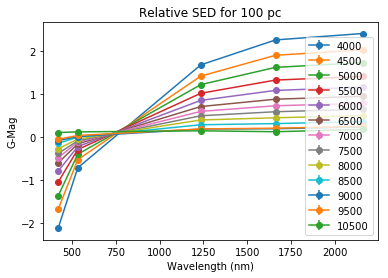

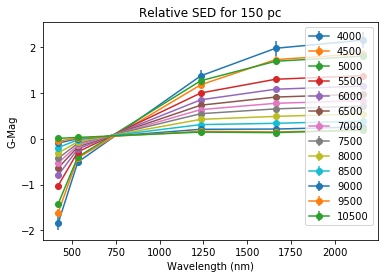

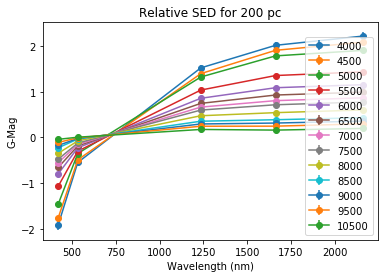

In [25]:
#Plot relative SED by distance 
plt.figure()
for i in range(len(temps2)): 
    plt.errorbar(wvl,temp_mags100[i,:],yerr = temp_std100[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Relative SED for 100 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('G-Mag')
    plt.legend()

plt.figure()
for i in range(len(temps2)): 
    plt.errorbar(wvl,temp_mags150[i,:],yerr = temp_std150[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Relative SED for 150 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('G-Mag')
    plt.legend()

plt.figure()
for i in range(len(temps2)): 
    plt.errorbar(wvl,temp_mags200[i,:],yerr = temp_std200[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Relative SED for 200 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('G-Mag')
    plt.legend()


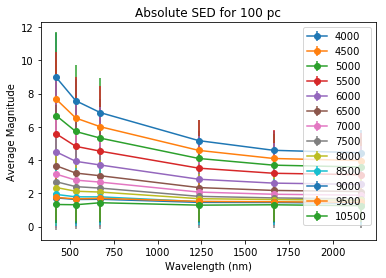

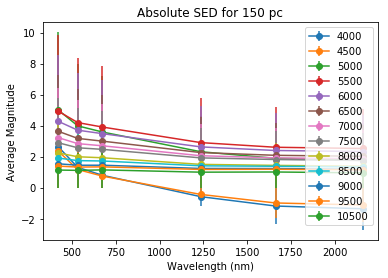

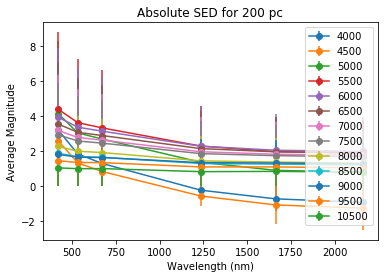

In [20]:
#Plot absolute SED for each distance
plt.figure()
for i in range(len(temps2)): 
    plt.errorbar(wvl2,abs_temp_mags100[i,:],yerr = abs_temp_std150[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Absolute SED for 100 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Average Magnitude')
    plt.legend()
    
plt.figure()
for i in range(len(temps2)): 
    plt.errorbar(wvl2,abs_temp_mags150[i,:],yerr = abs_temp_std150[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Absolute SED for 150 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Average Magnitude')
    plt.legend()

plt.figure()
for i in range(len(temps2)): 
    plt.errorbar(wvl2,abs_temp_mags200[i,:],yerr = abs_temp_std200[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Absolute SED for 200 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Average Magnitude')
    plt.legend()

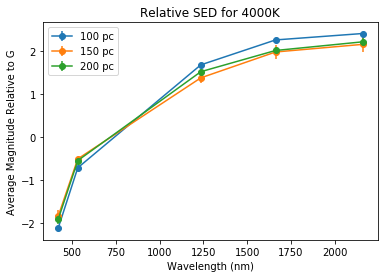

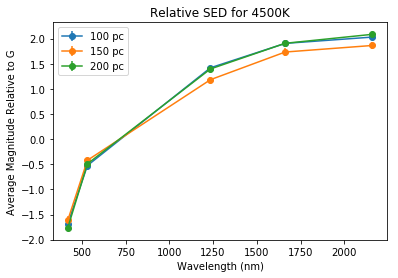

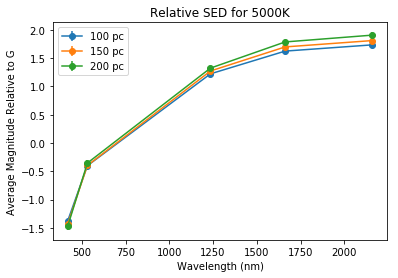

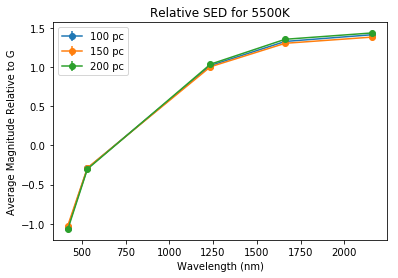

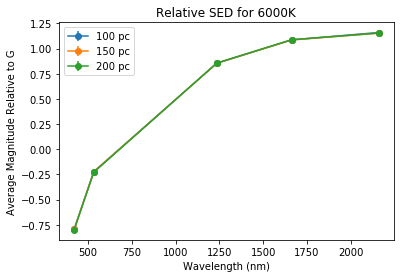

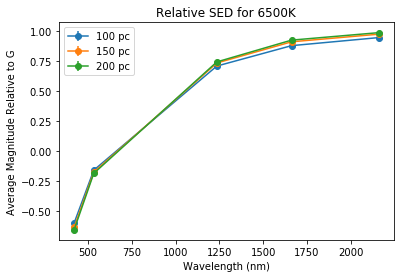

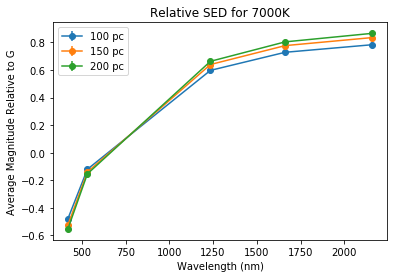

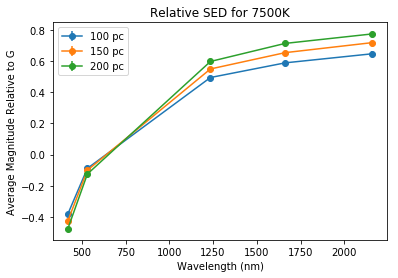

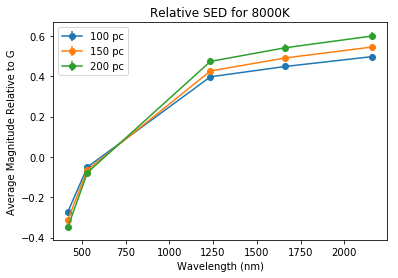

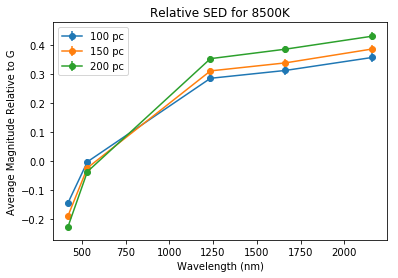

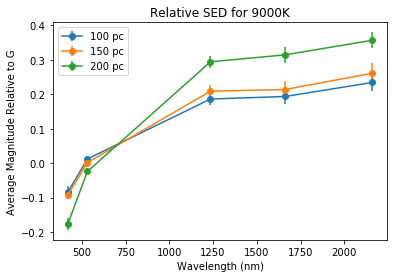

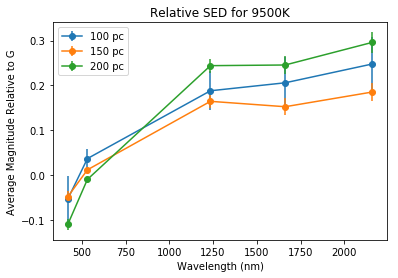

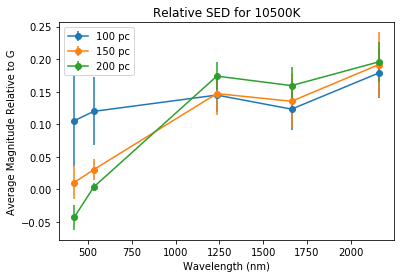

In [22]:
#Compare Templates: For each temperature category (4000 to 10500) plot Relative SED
for i in range(len(temps2)): 
    plt.figure()
    plt.errorbar(wvl,temp_mags100[i],yerr = temp_std100[i],linestyle = '-', marker = 'o',label = '100 pc')
    plt.errorbar(wvl,temp_mags150[i],yerr = temp_std150[i],linestyle = '-', marker = 'o', label = '150 pc')
    plt.errorbar(wvl,temp_mags200[i],yerr = temp_std200[i],linestyle = '-', marker = 'o', label = '200 pc')
    plt.title('Relative SED for '+ str(temps2[i]) + 'K')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Average Magnitude Relative to G')
    plt.legend()



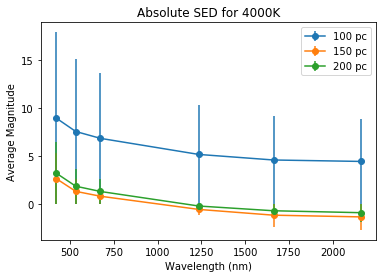

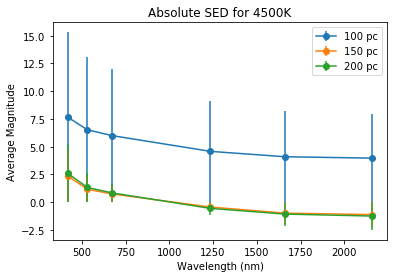

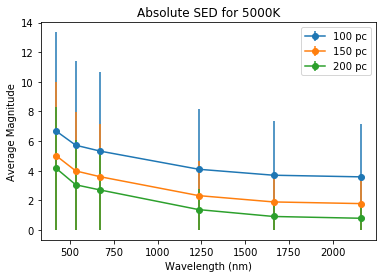

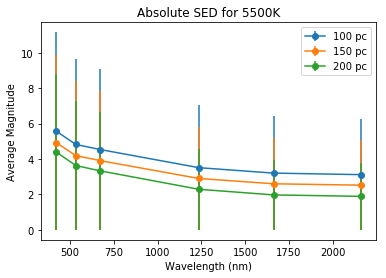

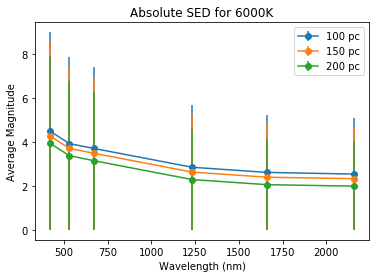

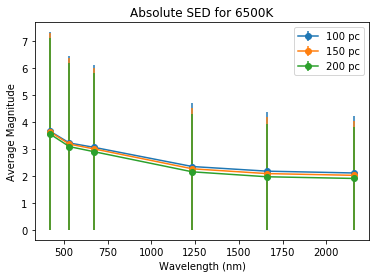

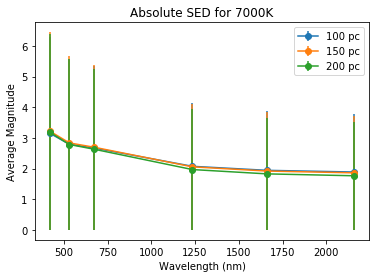

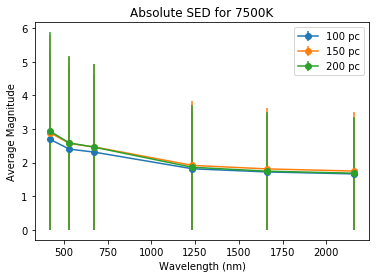

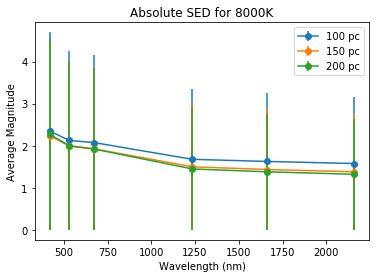

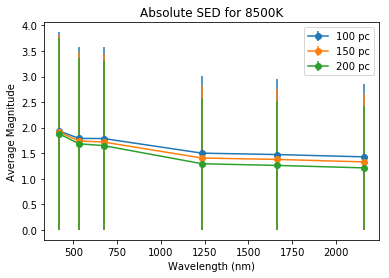

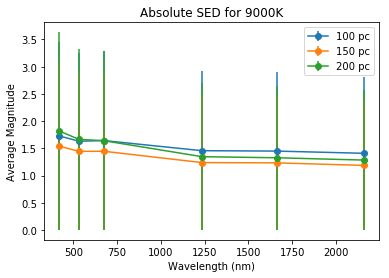

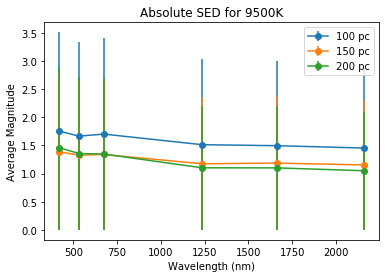

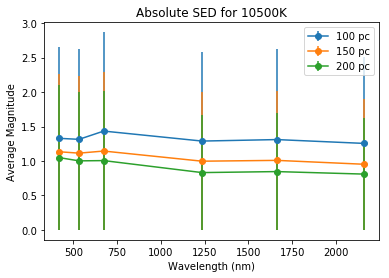

In [46]:
#Compare_templates: For each temperature category (starting at 4000) plot absolute SED
for i in range(len(temps2)): 
    plt.figure()
    plt.errorbar(wvl2,abs_temp_mags100[i],yerr = abs_temp_std100[i],linestyle = '-', marker = 'o',label = '100 pc')
    plt.errorbar(wvl2,abs_temp_mags150[i],yerr = abs_temp_std150[i],linestyle = '-', marker = 'o', label = '150 pc')
    plt.errorbar(wvl2,abs_temp_mags200[i],yerr = abs_temp_std200[i],linestyle = '-', marker = 'o', label = '200 pc')
    plt.title('Absolute SED for '+ str(temps2[i]) + 'K')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Average Magnitude')
    plt.legend()

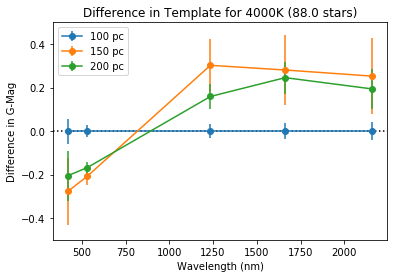

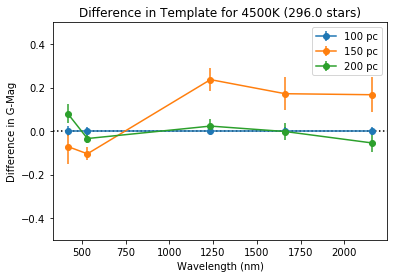

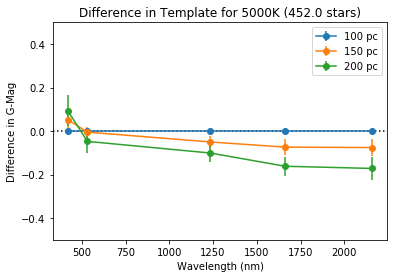

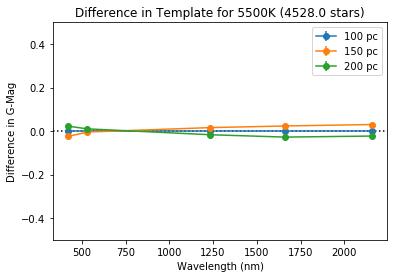

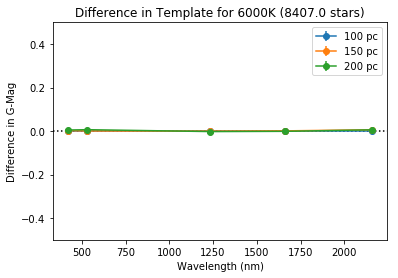

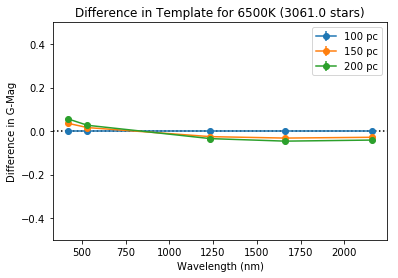

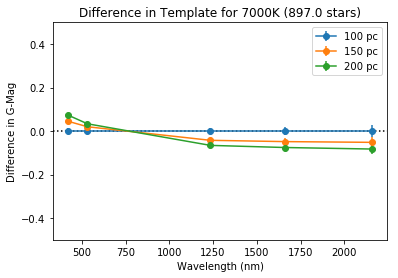

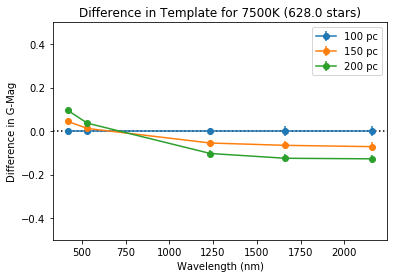

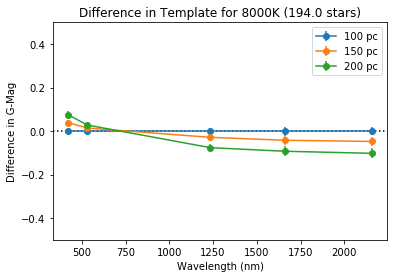

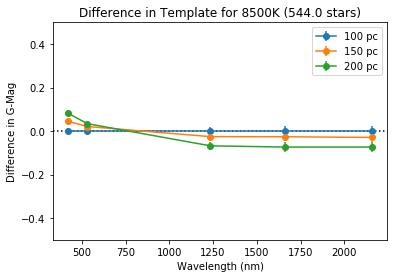

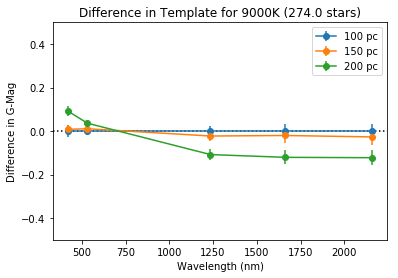

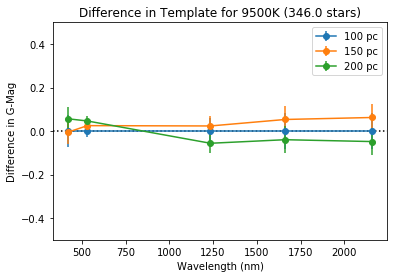

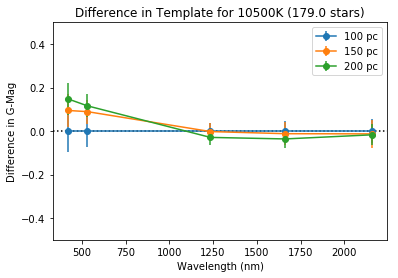

In [31]:
#Plot G-Mag of all stars minus G-Mag for distance stars
all_diff100 = np.zeros([len(temps2),len(wvl)])
all_diff150 = np.zeros([len(temps2),len(wvl)])
all_diff200 = np.zeros([len(temps2),len(wvl)])
all_diff_std100 = np.zeros([len(temps2),len(wvl)])
all_diff_std150 = np.zeros([len(temps2),len(wvl)])
all_diff_std200 = np.zeros([len(temps2),len(wvl)])
for i in range(0,len(temps2)): 
    for j in range(len(wvl)):
        all_diff100[i,j] = temp_mags[i,j] - temp_mags100[i,j]
        all_diff150[i,j] = temp_mags[i,j] - temp_mags150[i,j]
        all_diff200[i,j] = temp_mags[i,j] - temp_mags200[i,j]
        all_diff_std100[i,j] = math.sqrt(math.pow(temp_std[i,j],2) + math.pow(temp_std100[i,j],2))
        all_diff_std150[i,j] = math.sqrt(math.pow(temp_std[i,j],2) + math.pow(temp_std150[i,j],2))
        all_diff_std200[i,j] = math.sqrt(math.pow(temp_std[i,j],2) + math.pow(temp_std200[i,j],2))
    num_star = num_stars[i+1]
    plt.figure()
    plt.errorbar(wvl, all_diff100[i,:],yerr = all_diff_std100[i,:],linestyle = '-', marker = 'o',label = '100 pc')
    plt.errorbar(wvl, all_diff150[i,:],yerr = all_diff_std150[i,:],linestyle = '-', marker = 'o',label = '150 pc')
    plt.errorbar(wvl, all_diff200[i,:],yerr = all_diff_std200[i,:],linestyle = '-', marker = 'o',label = '200 pc')
    plt.axhline(linestyle = ':', color = 'k')
    plt.ylim(ymin=-0.5,ymax=0.5)
    plt.title('Difference in Template for '+ str(temps2[i]) + 'K (' + str(num_star) + ' stars)' )
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Difference in G-Mag')
    plt.legend()




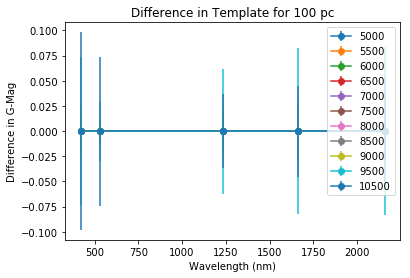

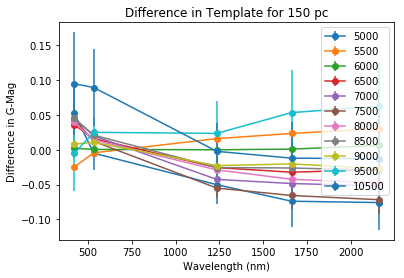

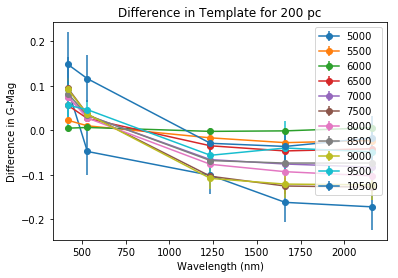

In [47]:
#Plot relative SED by distance 
plt.figure()
for i in range(2,len(temps2)): 
    plt.errorbar(wvl,all_diff100[i,:],yerr = all_diff_std100[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Difference in Template for 100 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Difference in G-Mag')
    plt.legend()

plt.figure()
for i in range(2,len(temps2)): 
    plt.errorbar(wvl,all_diff150[i,:],yerr = all_diff_std150[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Difference in Template for 150 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Difference in G-Mag')
    plt.legend()

plt.figure()
for i in range(2,len(temps2)): 
    plt.errorbar(wvl,all_diff200[i,:],yerr = all_diff_std200[i,:],linestyle = '-', marker = 'o',label = str(temps2[i]))
    plt.title('Difference in Template for 200 pc')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Difference in G-Mag')
    plt.legend()

In [21]:
#Compare templates for each temperature using standard deviation of templates
dev150 = np.zeros([len(temps2),len(wvl)])
dev200 = np.zeros([len(temps2),len(wvl)])
for i in range(0,len(temps2)): 
    for j in range(len(wvl)):
        er100 = [temp_mags100[i,j]-temp_std100[i,j],temp_mags100[i,j]+temp_std100[i,j]]
        #er150 = [temp_mags150[i,j]-temp_std150[i,j],temp_mags150[i,j]+temp_std150[i,j]]
        #er200 = [temp_mags200[i,j]-temp_std200[i,j],temp_mags200[i,j]+temp_std200[i,j]]
        #val100 = temp_mags100[i+1,j]
        val150 = temp_mags150[i,j]
        val200 = temp_mags200[i,j]
        if (val150 < er100[0] or val150 >er100[1]):
            dev150[i,j] = val150 - temp_mags100[i,j]
        if (val200 < er100[0] or val200 > er100[1]):
            dev200[i,j] = val200 - temp_mags100[i,j]
print(dev150)
print(dev200)

[[ 0.27748224  0.20733031 -0.30250537 -0.28085142 -0.2527183 ]
 [ 0.0711007   0.1045111  -0.2366524  -0.1718354  -0.16715956]
 [-0.05290251  0.          0.05008958  0.07382923  0.07574866]
 [ 0.02489205  0.00432883 -0.0160156  -0.02347406 -0.03019114]
 [-0.00210511  0.          0.          0.         -0.00616288]
 [-0.03592151 -0.01612118  0.02557874  0.03219186  0.02848376]
 [-0.04549643 -0.01994532  0.04250249  0.04842669  0.05184218]
 [-0.04428626 -0.01216737  0.05492402  0.06561952  0.07160359]
 [-0.03921915 -0.01414879  0.02880445  0.04229267  0.04769603]
 [-0.04505765 -0.02105433  0.02556203  0.0261141   0.02923627]
 [ 0.         -0.01068237  0.02271748  0.          0.0268417 ]
 [ 0.         -0.02504035  0.          0.         -0.06251366]
 [-0.09485716 -0.08939676  0.          0.          0.        ]]
[[ 0.20520431  0.16764963 -0.15914424 -0.24567074 -0.19384315]
 [-0.08027222  0.03424487 -0.02296963  0.          0.05464127]
 [-0.09350221  0.04744443  0.10098669  0.16175952  0.1

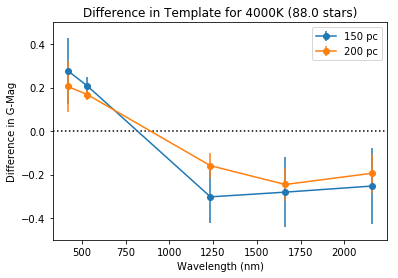

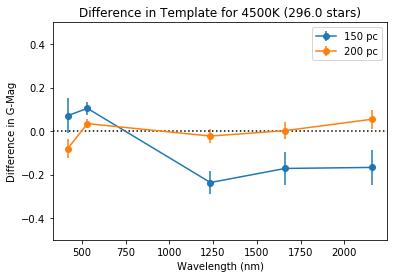

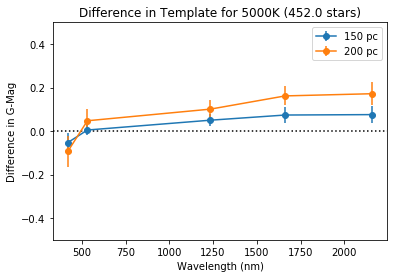

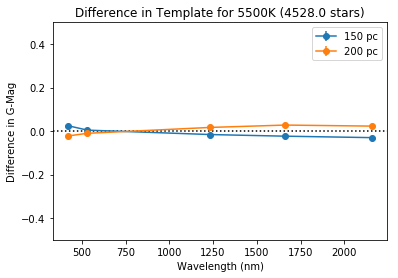

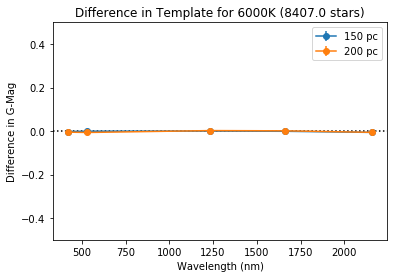

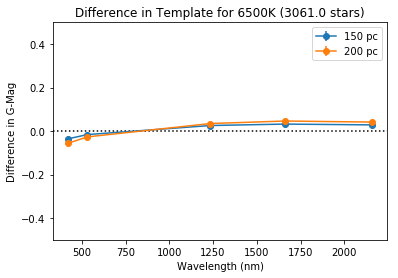

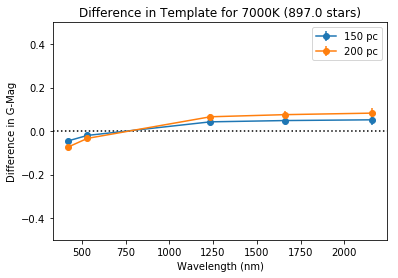

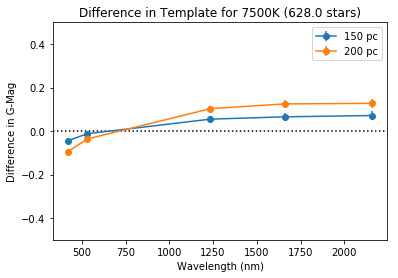

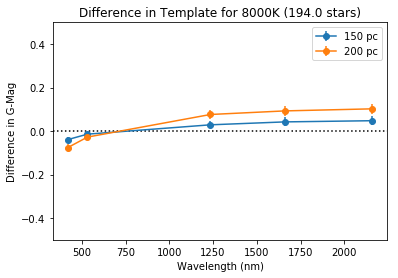

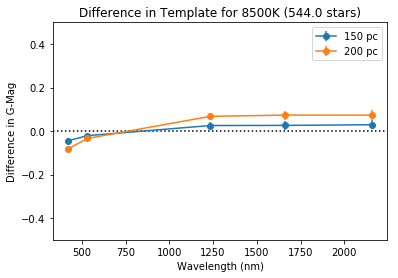

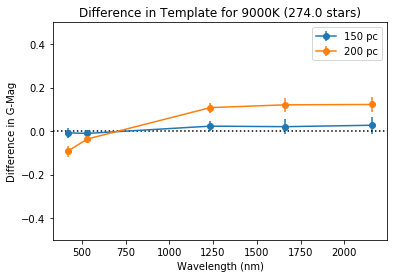

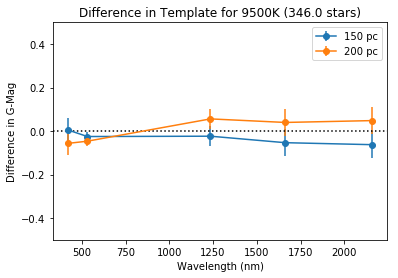

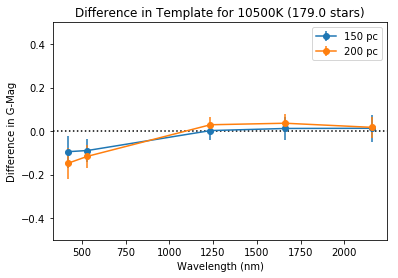

In [52]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('Template_Differences.pdf')

diff150 = np.zeros([len(temps2),len(wvl)])
diff200 = np.zeros([len(temps2),len(wvl)])
diff_std150 = np.zeros([len(temps2),len(wvl)])
diff_std200 = np.zeros([len(temps2),len(wvl)])
for i in range(0,len(temps2)): 
    for j in range(len(wvl)):
        diff150[i,j] = temp_mags150[i,j] - temp_mags100[i,j]
        diff200[i,j] = temp_mags200[i,j] - temp_mags100[i,j]
        diff_std150[i,j] = math.sqrt(math.pow(temp_std150[i,j],2) + math.pow(temp_std100[i,j],2))
        diff_std200[i,j] = math.sqrt(math.pow(temp_std200[i,j],2) + math.pow(temp_std100[i,j],2))
    num_star = num_stars[i+1]
    plt.figure()
    plt.errorbar(wvl, diff150[i,:],yerr = diff_std150[i,:],linestyle = '-', marker = 'o',label = '150 pc')
    plt.errorbar(wvl, diff200[i,:],yerr = diff_std200[i,:],linestyle = '-', marker = 'o',label = '200 pc')
    plt.axhline(linestyle = ':', color = 'k')
    plt.ylim(ymin=-0.5,ymax=0.5)
    plt.title('Difference in Template for '+ str(temps2[i]) + 'K (' + str(num_star) + ' stars)' )
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Difference in G-Mag')
    plt.legend()
    pp.savefig()
pp.close()


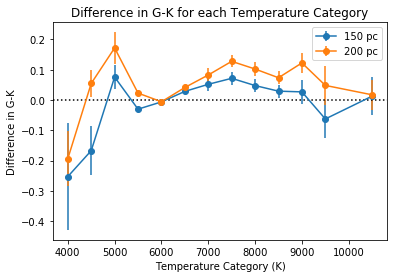

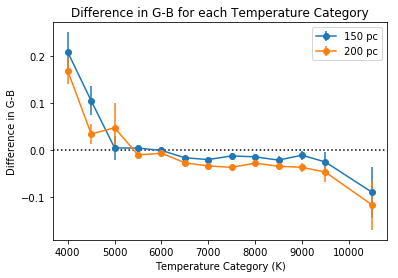

In [55]:
#Plot G-K and G-B over each temperature bin for 100 pc, 150 pc and 200 pc

pp2 = PdfPages('Temperature_Differences.pdf')
#Plot of G-K
plt.errorbar(temps2, diff150[:,4],yerr = diff_std150[:,4],linestyle = '-', marker = 'o',label = '150 pc')
plt.errorbar(temps2, diff200[:,4],yerr = diff_std200[:,4],linestyle = '-', marker = 'o',label = '200 pc')
plt.axhline(linestyle = ':', color = 'k')
plt.title('Difference in G-K for each Temperature Category' )
plt.xlabel('Temperature Category (K)')
plt.ylabel('Difference in G-K')
plt.legend()
pp2.savefig()
plt.show()

#Plot of G-B
plt.figure()
plt.errorbar(temps2, diff150[:,1],yerr = diff_std150[:,1],linestyle = '-', marker = 'o',label = '150 pc')
plt.errorbar(temps2, diff200[:,1],yerr = diff_std200[:,1],linestyle = '-', marker = 'o',label = '200 pc')
plt.axhline(linestyle = ':', color = 'k')
plt.title('Difference in G-B for each Temperature Category' )
plt.xlabel('Temperature Category (K)')
plt.ylabel('Difference in G-B')
plt.legend()
pp2.savefig()
plt.show()

pp2.close()

In [50]:
print(temp_std)
print(diff_std150)

[[ 0.04057543  0.01884872  0.02172246  0.0271763   0.02980494]
 [ 0.01584448  0.01465805  0.00930666  0.01232297  0.0132268 ]
 [ 0.0084865   0.00849442  0.00579654  0.00777787  0.00813985]
 [ 0.00262382  0.00167116  0.00217386  0.0028869   0.00300822]
 [ 0.00203761  0.00199562  0.00199855  0.00252131  0.00261909]
 [ 0.00369272  0.00265336  0.00475026  0.00556025  0.00551524]
 [ 0.00847135  0.00534207  0.0105273   0.01315516  0.0206274 ]
 [ 0.01098084  0.00446575  0.01147546  0.01506101  0.01635913]
 [ 0.00794402  0.00327476  0.01111981  0.01447433  0.01429311]
 [ 0.0110307   0.00817414  0.01327625  0.0166624   0.01687352]
 [ 0.01817835  0.00801486  0.01623763  0.02291321  0.0241716 ]
 [ 0.05227431  0.02071886  0.04397677  0.05848752  0.059246  ]
 [ 0.06947905  0.05239277  0.02586496  0.0320011   0.03817196]]
[[ 0.08080029  0.03034771  0.0544983   0.07586437  0.07997841]
 [ 0.0433236   0.02472169  0.02769966  0.0373036   0.03927892]
 [ 0.00445717  0.00231084  0.00381665  0.00502718  0.0

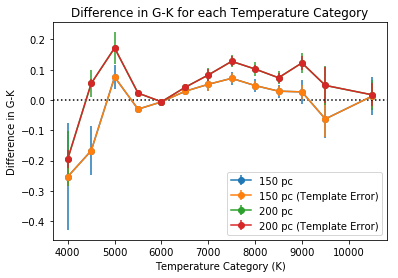

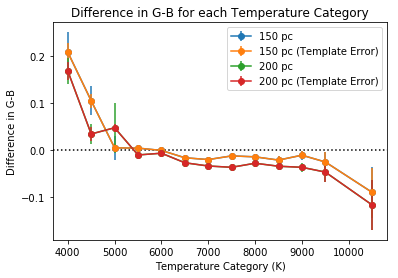

In [57]:
#Plot G-K and G-B over each temperature bin for 100 pc, 150 pc and 200 pc

pp3 = PdfPages('Temperature_Differences2.pdf')
#Plot of G-K
plt.errorbar(temps2, diff150[:,4],yerr = diff_std150[:,4],linestyle = '-', marker = 'o',label = '150 pc')
plt.errorbar(temps2, diff150[:,4],yerr = temp_std[:,4],linestyle = '-', marker = 'o',label = '150 pc (Template Error)')
plt.errorbar(temps2, diff200[:,4],yerr = diff_std200[:,4],linestyle = '-', marker = 'o',label = '200 pc')
plt.errorbar(temps2, diff200[:,4],yerr = temp_std[:,4],linestyle = '-', marker = 'o',label = '200 pc (Template Error)')
plt.axhline(linestyle = ':', color = 'k')
plt.title('Difference in G-K for each Temperature Category' )
plt.xlabel('Temperature Category (K)')
plt.ylabel('Difference in G-K')
plt.legend()
pp3.savefig()
plt.show()

#Plot of G-B
plt.figure()
plt.errorbar(temps2, diff150[:,1],yerr = diff_std150[:,1],linestyle = '-', marker = 'o',label = '150 pc')
plt.errorbar(temps2, diff150[:,1],yerr = temp_std[:,1],linestyle = '-', marker = 'o',label = '150 pc (Template Error)')
plt.errorbar(temps2, diff200[:,1],yerr = diff_std200[:,1],linestyle = '-', marker = 'o',label = '200 pc')
plt.errorbar(temps2, diff200[:,1],yerr = temp_std[:,1],linestyle = '-', marker = 'o',label = '200 pc (Template Error)')
plt.axhline(linestyle = ':', color = 'k')
plt.title('Difference in G-B for each Temperature Category' )
plt.xlabel('Temperature Category (K)')
plt.ylabel('Difference in G-B')
plt.legend()
pp3.savefig()
plt.show()

pp3.close()

In [ ]:
#Plot G-K and G-B over each temperature bin for 100 pc, 150 pc and 200 pc

temps3 = [4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500]
print(diff150)

pp2 = PdfPages('Temperature_Differences.pdf')
#Plot of G-K
plt.errorbar(temps3, diff150[:,4],yerr = diff_std150[:,4],linestyle = '-', marker = 'o',label = '150 pc')
plt.errorbar(temps3, diff200[:,4],yerr = diff_std200[:,4],linestyle = '-', marker = 'o',label = '200 pc')
plt.axhline(linestyle = ':', color = 'k')
plt.title('Difference in G-K for each Temperature Category' )
plt.xlabel('Temperature Category (K)')
plt.ylabel('Difference in G-K')
plt.legend()
pp2.savefig()
plt.show()

#Plot of G-B
plt.figure()
plt.errorbar(temps3, diff150[:,1],yerr = diff_std150[:,1],linestyle = '-', marker = 'o',label = '150 pc')
plt.errorbar(temps3, diff200[:,1],yerr = diff_std200[:,1],linestyle = '-', marker = 'o',label = '200 pc')
plt.axhline(linestyle = ':', color = 'k')
plt.title('Difference in G-B for each Temperature Category' )
plt.xlabel('Temperature Category (K)')
plt.ylabel('Difference in G-B')
plt.legend()
pp2.savefig()
plt.show()

pp2.close()

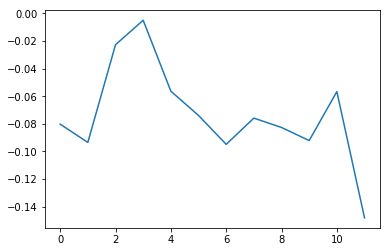

In [45]:
plt.plot(diff200[:,0])

In [ ]:
#assign stars of 6000 K a distance category
distance_cat2 = np.zeros(len(Dist))
for i in range(len(temp_cat)):
    if (temp_cat[i] == 6000):
        for j in range(20,200,20):
            if (j == 20):
                if (Dist[i] <= j):
                    distance_cat2[i] = j
            if (Dist[i] <= j and Dist[i] > j-20):
                distance_cat2[i] = j 
print(distance_cat2)          

In [ ]:
#Determine average value of G-Mag for each distance category 
distances = list(range(20,200,20))
for i in range(20,200,20):
    G_B_array = ma.array([])
    G_V_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    for j in range(len(distance_cat2)):
        if (distance_cat2[j] == i):
            G_V_array = np.append(G_V_array,Gmags[j]-Vmags[j])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
    array = [np.mean(G_B_array), np.mean(G_V_array), np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    err  = [np.std(G_B_array), np.std(G_V_array), np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    if (i == 20):
        dist_array = array
        err_array = err
    if (i != 20):
        dist_array = np.vstack((dist_array,array))
        err_array = np.vstack((err_array,err))
print(dist_array)
print(err_array)
for i in range(0,4):
    plt.figure()
    plt.errorbar(distances, dist_array[:,i], yerr = err_array[:,i], linestyle = '-', marker = 'o')
    plt.xlabel('Distance Category (pc)')
    if i == 0: plt.ylabel('G-B')
    if i == 1: plt.ylabel('G-V')
    if i == 2: plt.ylabel('G-J')
    if i == 3: plt.ylabel('G-H')
    if i == 4: plt.ylabel('G-K')
    plt.title('Average value for G-Mag for each Distance Category (6000 K)')
   
     
        
        

In [ ]:
#test template for stars closer than 100 pc
stars_tested = 0
#array of minimum chi^2 for each star 
chi_mins100 = np.zeros(len(Teff))
#array of temperature template with best fit
best_fit_temp100 = np.zeros(len(Teff))
[row,col] = temp_mags100.shape
for i in range(len(Teff)):
        #only class V stars that have a temperature category assigned
        if (temp_cat[i] != 0 and distance_cat[i] == 100 and Gmags.mask[i] != True and Bmags.mask[i] != True \
            and Vmags.mask[i] != True and Jmags.mask[i] != True and Hmags.mask[i] != True and Kmags.mask[i] != True):
            #calculate each color index for each star
            stars_tested = stars_tested+1
            G_B_val = Gmags[i]-Bmags[i]
            G_V_val = Gmags[i]-Vmags[i]
            G_J_val = Gmags[i]-Jmags[i]
            G_H_val = Gmags[i]-Hmags[i]
            G_K_val = Gmags[i]-Kmags[i]
            #array of color indices
            vals = [G_B_val, G_V_val, G_J_val, G_H_val, G_K_val]
            #large value for chi min
            chi_min = 1e100
            #for each temperature template calculate chi^2
            for j in range(1,row): 
                chi_val = 0
                #calculates chi^2 for each color index and adds to chi^2 val
                for k in range(len(vals)):
                    #chi_val = chi_val+ math.pow(((vals[k]-temp_mags[j,k])/0.1),2)
                    chi_val = chi_val+ math.pow(((vals[k]-temp_mags100[j,k])/temp_std100[j,k]),2)
                #if chi^2 val is smallest add chi^2 value and temperature template category to array
                if (chi_val < chi_min):
                    chi_min = chi_val
                    chi_mins100[i] = chi_val
                    best_fit_temp100[i] = temps[j-1]
print(chi_mins100)
print(best_fit_temp100)
print('Stars tested :' + str(stars_tested))

#determine how many template fits are good
good_fit_num = 0
bad_fit_num = 0
for i in range(len(Teff)):
    if (temp_cat[i] != 0):
        if (best_fit_temp100[i] == temp_cat[i]):
            good_fit_num = good_fit_num +1
        else:
            bad_fit_num = bad_fit_num+1
print('Stars that match: ' + str(good_fit_num))
print('Stars that do not match: ' +str(bad_fit_num))
print('Total stars: ' +str(good_fit_num+bad_fit_num))

#find difference between actual temperature and template
temp_diff100 = np.array([])
for i in range(len(Teff)):
    if (best_fit_temp100[i] !=0):
        temp_diff100 = np.append(temp_diff100,Teff[i] - best_fit_temp100[i])
print(temp_diff100.shape)
print('Mean of distribution: '+ str(np.mean(temp_diff100)))
print('Standard deviation of distribution: ' + str(np.std(temp_diff100)))

#plot histogram of difference between actual temperature and template 
plt.hist(temp_diff100, range = [min(temp_diff100),max(temp_diff100)])

In [ ]:
#test template for stars between 100 and 150 pc 
stars_tested = 0
#array of minimum chi^2 for each star 
chi_mins150 = np.zeros(len(Teff))
#array of temperature template with best fit
best_fit_temp150 = np.zeros(len(Teff))
[row,col] = temp_mags150.shape
for i in range(len(Teff)):
        #only class V stars that have a temperature category assigned
        if (temp_cat[i] != 0 and distance_cat[i] == 150 and Gmags.mask[i] != True and Bmags.mask[i] != True and Vmags.mask[i] != True \
            and Jmags.mask[i] != True and Hmags.mask[i] != True and Kmags.mask[i] != True):
            #calculate each color index for each star
            stars_tested = stars_tested+1
            G_B_val = Gmags[i]-Bmags[i]
            G_V_val = Gmags[i]-Vmags[i]
            G_J_val = Gmags[i]-Jmags[i]
            G_H_val = Gmags[i]-Hmags[i]
            G_K_val = Gmags[i]-Kmags[i]
            #array of color indices
            vals = [G_B_val, G_V_val, G_J_val, G_H_val, G_K_val]
            #large value for chi min
            chi_min = 1e100
            #for each temperature template calculate chi^2
            for j in range(1,row): 
                chi_val = 0
                #calculates chi^2 for each color index and adds to chi^2 val
                for k in range(len(vals)):
                    #chi_val = chi_val+ math.pow(((vals[k]-temp_mags[j,k])/0.1),2)
                    chi_val = chi_val+ math.pow(((vals[k]-temp_mags150[j,k])/temp_std150[j,k]),2)
                #if chi^2 val is smallest add chi^2 value and temperature template category to array
                if (chi_val < chi_min):
                    chi_min = chi_val
                    chi_mins150[i] = chi_val
                    best_fit_temp150[i] = temps[j-1]
print(chi_mins150)
print(best_fit_temp150)
print('Stars tested :' + str(stars_tested))

#determine how many template fits are good
good_fit_num = 0
bad_fit_num = 0
for i in range(len(Teff)):
    if (temp_cat[i] != 0):
        if (best_fit_temp150[i] == temp_cat[i]):
            good_fit_num = good_fit_num +1
        else:
            bad_fit_num = bad_fit_num+1
print('Stars that match: ' + str(good_fit_num))
print('Stars that do not match: ' +str(bad_fit_num))
print('Total stars: ' +str(good_fit_num+bad_fit_num))

#find difference between actual temperature and template
temp_diff150 = np.array([])
for i in range(len(Teff)):
    if (best_fit_temp150[i] !=0):
        temp_diff150 = np.append(temp_diff150,Teff[i] - best_fit_temp150[i])
print(temp_diff150.shape)
print('Mean of distribution: '+ str(np.mean(temp_diff150)))
print('Standard deviation of distribution: ' + str(np.std(temp_diff150)))

#plot histogram of difference between actual temperature and template 
plt.hist(temp_diff150, range = [min(temp_diff150),max(temp_diff150)])

In [ ]:
#test template for stars between 150 and 200 pc 
stars_tested = 0
#array of minimum chi^2 for each star 
chi_mins200 = np.zeros(len(Teff))
#array of temperature template with best fit
best_fit_temp200 = np.zeros(len(Teff))
[row,col] = temp_mags200.shape
for i in range(len(Teff)):
        #only class V stars that have a temperature category assigned
        if (temp_cat[i] != 0 and distance_cat[i] == 200 and Gmags.mask[i] != True and Bmags.mask[i] != True and Vmags.mask[i] != True \
            and Jmags.mask[i] != True and Hmags.mask[i] != True and Kmags.mask[i] != True):
            #calculate each color index for each star
            stars_tested = stars_tested+1
            G_B_val = Gmags[i]-Bmags[i]
            G_V_val = Gmags[i]-Vmags[i]
            G_J_val = Gmags[i]-Jmags[i]
            G_H_val = Gmags[i]-Hmags[i]
            G_K_val = Gmags[i]-Kmags[i]
            #array of color indices
            vals = [G_B_val, G_V_val, G_J_val, G_H_val, G_K_val]
            #large value for chi min
            chi_min = 1e100
            #for each temperature template calculate chi^2
            for j in range(1,row): 
                chi_val = 0
                #calculates chi^2 for each color index and adds to chi^2 val
                for k in range(len(vals)):
                    #chi_val = chi_val+ math.pow(((vals[k]-temp_mags[j,k])/0.1),2)
                    chi_val = chi_val+ math.pow(((vals[k]-temp_mags200[j,k])/temp_std200[j,k]),2)
                #if chi^2 val is smallest add chi^2 value and temperature template category to array
                if (chi_val < chi_min):
                    chi_min = chi_val
                    chi_mins200[i] = chi_val
                    best_fit_temp200[i] = temps[j-1]
print(chi_mins200)
print(best_fit_temp200)
print('Stars tested :' + str(stars_tested))

#determine how many template fits are good
good_fit_num = 0
bad_fit_num = 0
for i in range(len(Teff)):
    if (temp_cat[i] != 0):
        if (best_fit_temp200[i] == temp_cat[i]):
            good_fit_num = good_fit_num +1
        else:
            bad_fit_num = bad_fit_num+1
print('Stars that match: ' + str(good_fit_num))
print('Stars that do not match: ' +str(bad_fit_num))
print('Total stars: ' +str(good_fit_num+bad_fit_num))

#find difference between actual temperature and template
temp_diff200 = np.array([])
for i in range(len(Teff)):
    if (best_fit_temp200[i] !=0):
        temp_diff200 = np.append(temp_diff200,Teff[i] - best_fit_temp200[i])
print(temp_diff200.shape)
print('Mean of distribution: '+ str(np.mean(temp_diff200)))
print('Standard deviation of distribution: ' + str(np.std(temp_diff200)))

#plot histogram of difference between actual temperature and template 
plt.hist(temp_diff200, range = [min(temp_diff200),max(temp_diff200)])